<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/sprint2/Greg_Shaughn_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [2]:
cell_phones.head()


,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [3]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
df = cell_phones.merge(population)


In [5]:
df.shape

(8590, 4)

In [3]:
df.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [3]:
geo_country_codes.head()
columns = ['geo', 'country']
geo_country_codes[columns].head()
sub_columns = ['geo', 'country']

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [4]:
df.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [0]:
merged = (geo_country_codes[['geo','country']]
         .merge(cell_phones[['geo', 'time', 'cell_phones_total']])
         .merge(population[['geo', 'time', 'population_total']]))

In [7]:
merged.shape

(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [4]:
pd.options.display.max_rows = 50000
merged['country']

0                          Afghanistan
1                          Afghanistan
2                          Afghanistan
3                          Afghanistan
4                          Afghanistan
5                          Afghanistan
6                          Afghanistan
7                          Afghanistan
8                          Afghanistan
9                          Afghanistan
10                         Afghanistan
11                         Afghanistan
12                         Afghanistan
13                         Afghanistan
14                         Afghanistan
15                         Afghanistan
16                         Afghanistan
17                         Afghanistan
18                         Afghanistan
19                         Afghanistan
20                         Afghanistan
21                         Afghanistan
22                         Afghanistan
23                         Afghanistan
24                         Afghanistan
25                       

In [5]:
merged.head()
usa = merged[merged['country'] == 'United States']
now_us = usa[usa['time'] == 2017]
now_us['cell_phones_total'].sum() / now_us['population_total'].sum() 


1.2201246847283354

In [0]:
merged['cell_phones_per_person'] = True

In [0]:
merged['cell_phones_per_person'] = merged['cell_phones_total'].sum()/merged['population_total'].sum()

In [0]:
merged['cell_phones_per_person']

In [29]:
merged.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
0,afg,Afghanistan,1960,0.0,8996351,0.301792
1,afg,Afghanistan,1965,0.0,9938414,0.301792
2,afg,Afghanistan,1970,0.0,11126123,0.301792
3,afg,Afghanistan,1975,0.0,12590286,0.301792
4,afg,Afghanistan,1976,0.0,12840299,0.301792


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
merged['geo'] = merged['geo'].str.upper()


In [10]:
merged.head()

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
0,AFG,Afghanistan,1960,0.0,8996351,0.301792
1,AFG,Afghanistan,1965,0.0,9938414,0.301792
2,AFG,Afghanistan,1970,0.0,11126123,0.301792
3,AFG,Afghanistan,1975,0.0,12590286,0.301792
4,AFG,Afghanistan,1976,0.0,12840299,0.301792


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [11]:
merged.describe()

,time,cell_phones_total,population_total,cell_phones_per_person
count,8590.000000,8.590000e+03,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07,3.017923e-01
std,14.257975,5.573408e+07,1.161284e+08,2.276090e-15
min,1960.000000,0.000000e+00,4.433000e+03,3.017923e-01
25%,1983.000000,0.000000e+00,1.456148e+06,3.017923e-01
50%,1995.000000,6.200000e+03,5.725062e+06,3.017923e-01
75%,2006.000000,1.697652e+06,1.810581e+07,3.017923e-01
max,2017.000000,1.474097e+09,1.409517e+09,3.017923e-01


In [13]:
import numpy as np
merged.describe(exclude=np.number)

,geo,country
count,8590,8590
unique,195,195
top,AUT,Pakistan
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
now = merged[merged['time'] == 2017]
most_phones = now[now['cell_phones_total'] > 236000000].sort_values(by='cell_phones_total')

In [17]:
# countries with the most cell phones are:
# 1. China 2. India 3. Indonesia 4. United States 5. Brazil
most_phones

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
1084,BRA,Brazil,2017,2.364885e+08,209288278,0.301792
8134,USA,United States,2017,3.958810e+08,324459463,0.301792
3549,IDN,Indonesia,2017,4.589232e+08,263991379,0.301792
3595,IND,India,2017,1.168902e+09,1339180127,0.301792
1496,CHN,China,2017,1.474097e+09,1409517397,0.301792


In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [18]:
# 2014 is the first year the USA had more cell phones than people
usa = merged[merged['country'] == 'United States']
usa[usa['cell_phones_total'] > usa['population_total']]

,geo,country,time,cell_phones_total,population_total,cell_phones_per_person
8131,USA,United States,2014,355500000.0,317718779,0.301792
8132,USA,United States,2015,382307000.0,319929162,0.301792
8133,USA,United States,2016,395881000.0,322179605,0.301792
8134,USA,United States,2017,395881000.0,324459463,0.301792


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [24]:
df['Year'].value_counts()

2000    169
2003    166
2013    166
1999    166
2010    165
2012    164
2008    164
2004    164
2009    163
2011    163
2014    163
2005    162
2006    161
2002    159
2001    157
2007    141
2015    100
Name: Year, dtype: int64

In [36]:
#1999
ninety9 = df[df['Year'] == 1999]
year99Act = ninety9[ninety9['Occupation'] == 'Acting, Comedy & Music'] # 90.36%
year99Gov = ninety9[ninety9['Occupation'] == 'Government and Politics'] # 1.2%
year99Med = ninety9[ninety9['Occupation'] == 'Media'] # 6.62%
year99Oth = ninety9[ninety9['Occupation'] == 'Other'] # 1.807%
year99Act.count() / ninety9['Occupation'].count()
year99Gov.count() / ninety9['Occupation'].count()
year99Med.count() / ninety9['Occupation'].count()
year99Oth.count() / ninety9['Occupation'].count()

Year                         0.018072
GoogleKnowlege_Occupation    0.000000
Show                         0.018072
Group                        0.000000
Guest                        0.018072
Occupation                   0.018072
dtype: float64

In [40]:
#2000
year = df[df['Year'] == 2000]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 73.96%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 8.28%
yearMed = year[year['Occupation'] == 'Media'] # 12.426%
yearOth = year[year['Occupation'] == 'Other'] # 5.325%
yearAct.count() / year['Occupation'].count()
yearGov.count() / year['Occupation'].count()
yearMed.count() / year['Occupation'].count()
yearOth.count() /year['Occupation'].count()

Year                         0.053254
GoogleKnowlege_Occupation    0.029586
Show                         0.053254
Group                        0.029586
Guest                        0.053254
Occupation                   0.053254
dtype: float64

In [45]:
#2001
year = df[df['Year'] == 2001]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 72.61%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 3.82%
yearMed = year[year['Occupation'] == 'Media'] # 19.745%
yearOth = year[year['Occupation'] == 'Other'] # 3.82%
yearAct.count() / year['Occupation'].count()
yearGov.count() / year['Occupation'].count()
yearMed.count() / year['Occupation'].count()
yearOth.count() /year['Occupation'].count()

Year                         0.038217
GoogleKnowlege_Occupation    0.031847
Show                         0.038217
Group                        0.031847
Guest                        0.038217
Occupation                   0.038217
dtype: float64

In [49]:
#2002
year = df[df['Year'] == 2002]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 62.26%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 6.918%
yearMed = year[year['Occupation'] == 'Media'] # 26.415%
yearOth = year[year['Occupation'] == 'Other'] # 4.40%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.622642
GoogleKnowlege_Occupation    0.622642
Show                         0.622642
Group                        0.622642
Guest                        0.622642
Occupation                   0.622642
dtype: float64

In [53]:
#2003
year = df[df['Year'] == 2003]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 56.02%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 10.24%
yearMed = year[year['Occupation'] == 'Media'] # 24.698%
yearOth = year[year['Occupation'] == 'Other'] # 9.03%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.560241
GoogleKnowlege_Occupation    0.560241
Show                         0.560241
Group                        0.560241
Guest                        0.560241
Occupation                   0.560241
dtype: float64

In [57]:
#2004
year = df[df['Year'] == 2004]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 38.4146%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 22.561%
yearMed = year[year['Occupation'] == 'Media'] # 27.439%
yearOth = year[year['Occupation'] == 'Other'] # 11.585%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.384146
GoogleKnowlege_Occupation    0.384146
Show                         0.384146
Group                        0.384146
Guest                        0.384146
Occupation                   0.384146
dtype: float64

In [61]:
#2005
year = df[df['Year'] == 2005]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 37.037%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 16.049%
yearMed = year[year['Occupation'] == 'Media'] # 33.33%
yearOth = year[year['Occupation'] == 'Other'] # 13.58%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.37037
GoogleKnowlege_Occupation    0.37037
Show                         0.37037
Group                        0.37037
Guest                        0.37037
Occupation                   0.37037
dtype: float64

In [65]:
#2006
year = df[df['Year'] == 2006]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 36.02%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 19.25%
yearMed = year[year['Occupation'] == 'Media'] # 29.192%
yearOth = year[year['Occupation'] == 'Other'] # 15.528%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.360248
GoogleKnowlege_Occupation    0.360248
Show                         0.360248
Group                        0.360248
Guest                        0.360248
Occupation                   0.360248
dtype: float64

In [69]:
#2007
year = df[df['Year'] == 2007]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 25.53%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 17.02%
yearMed = year[year['Occupation'] == 'Media'] # 33.33%
yearOth = year[year['Occupation'] == 'Other'] # 24.11%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.255319
GoogleKnowlege_Occupation    0.255319
Show                         0.255319
Group                        0.255319
Guest                        0.255319
Occupation                   0.255319
dtype: float64

In [73]:
#2008
year = df[df['Year'] == 2008]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 20.73%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 20.12%
yearMed = year[year['Occupation'] == 'Media'] # 46.95%
yearOth = year[year['Occupation'] == 'Other'] # 12.19%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.207317
GoogleKnowlege_Occupation    0.207317
Show                         0.207317
Group                        0.207317
Guest                        0.207317
Occupation                   0.207317
dtype: float64

In [79]:
#2009
year = df[df['Year'] == 2009]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 20.8589%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 20.8589%
yearMed = year[year['Occupation'] == 'Media'] # 36.196%
yearOth = year[year['Occupation'] == 'Other'] # 22.0859%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.208589
GoogleKnowlege_Occupation    0.208589
Show                         0.208589
Group                        0.208589
Guest                        0.208589
Occupation                   0.208589
dtype: float64

In [84]:
#2010
year = df[df['Year'] == 2010]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 35.15%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 18.18%
yearMed = year[year['Occupation'] == 'Media'] # 30.3%
yearOth = year[year['Occupation'] == 'Other'] # 16.36%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.351515
GoogleKnowlege_Occupation    0.351515
Show                         0.351515
Group                        0.351515
Guest                        0.351515
Occupation                   0.351515
dtype: float64

In [88]:
#2011
year = df[df['Year'] == 2011]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 33.74%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 16.56%
yearMed = year[year['Occupation'] == 'Media'] # 31.288%
yearOth = year[year['Occupation'] == 'Other'] # 18.4%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.337423
GoogleKnowlege_Occupation    0.337423
Show                         0.337423
Group                        0.337423
Guest                        0.337423
Occupation                   0.337423
dtype: float64

In [92]:
#2012
year = df[df['Year'] == 2012]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 26.829%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 20.1%
yearMed = year[year['Occupation'] == 'Media'] # 31.7%
yearOth = year[year['Occupation'] == 'Other'] # 21.3%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.268293
GoogleKnowlege_Occupation    0.268293
Show                         0.268293
Group                        0.268293
Guest                        0.268293
Occupation                   0.268293
dtype: float64

In [96]:
#2013
year = df[df['Year'] == 2013]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 42.77%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 12.65%
yearMed = year[year['Occupation'] == 'Media'] # 30.72%
yearOth = year[year['Occupation'] == 'Other'] # 13.855%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.427711
GoogleKnowlege_Occupation    0.427711
Show                         0.427711
Group                        0.427711
Guest                        0.427711
Occupation                   0.427711
dtype: float64

In [100]:
#2014
year = df[df['Year'] == 2014]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 39.26%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 12.88%
yearMed = year[year['Occupation'] == 'Media'] # 32.515%
yearOth = year[year['Occupation'] == 'Other'] # 15.337%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.392638
GoogleKnowlege_Occupation    0.392638
Show                         0.392638
Group                        0.392638
Guest                        0.392638
Occupation                   0.392638
dtype: float64

In [104]:
#2015
year = df[df['Year'] == 2015]
yearAct = year[year['Occupation'] == 'Acting, Comedy & Music'] # 45%
yearGov = year[year['Occupation'] == 'Government and Politics'] # 17%
yearMed = year[year['Occupation'] == 'Media'] # 24%
yearOth = year[year['Occupation'] == 'Other'] # 14%
yearAct.count() / year['Occupation'].count()
#yearGov.count() / year['Occupation'].count()
#yearMed.count() / year['Occupation'].count()
#yearOth.count() /year['Occupation'].count()

Year                         0.45
GoogleKnowlege_Occupation    0.45
Show                         0.45
Group                        0.45
Guest                        0.45
Occupation                   0.45
dtype: float64

### Part 2 — Recreate this explanatory visualization:

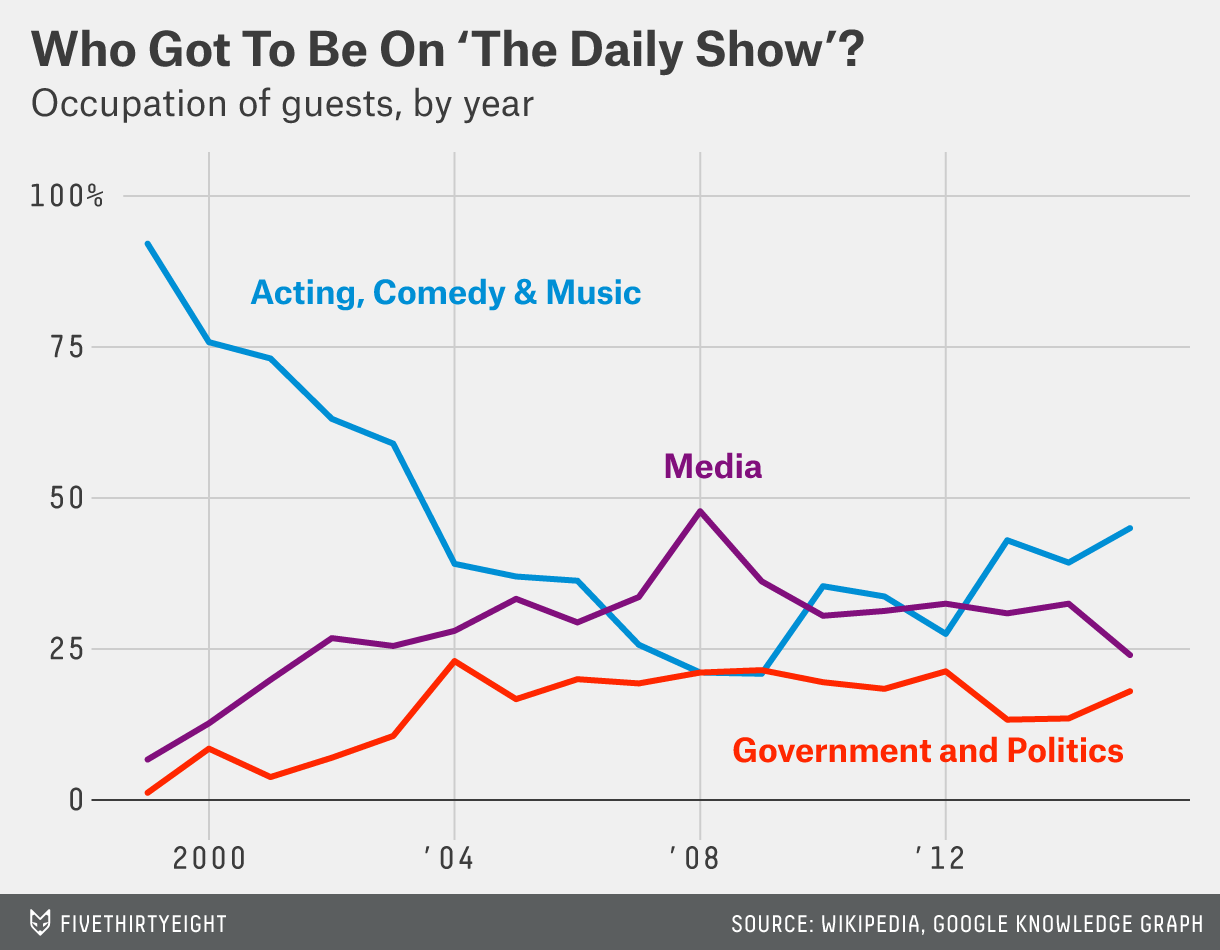

In [105]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [146]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation,Occupation_number
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music",1
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music",1
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music",1
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music",1
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music",1


In [147]:
df.dtypes

Year                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Guest                        object
Occupation                   object
Occupation_number            object
dtype: object

In [0]:
df['Occupation_number'] = True
df['Occupation_number'] = df['Occupation'].replace({'Acting, Comedy & Music':1, 'Government and Politics': 2, 'Media': 3})

In [148]:
ct = pd.crosstab( df['Year'], df['Occupation'])
ct
ct = ct.drop(columns='Other')
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,150,2,11
2000,125,14,21
2001,114,6,31
2002,99,11,42
2003,93,17,41
2004,63,37,45
2005,60,26,54
2006,58,31,47
2007,36,24,47


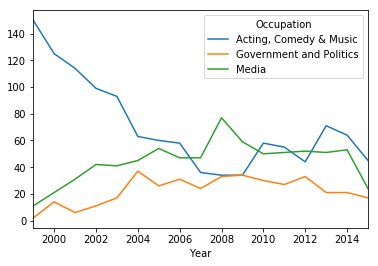

In [149]:
ct.plot()

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)